# Weather GAN Results

good model checkpoints:

- /home/ftei-dsw/data/weather-gan/checkpoints/weather-gan/16h_29m_18/1bfcabc2-b67f-11ec-883b-845cf3c98452/last.ckpt



In [4]:
%load_ext autoreload
%autoreload 2
#%cd /home/ftei-dsw/projects/weather-gan
%cd /home/hess/projects/weather-gan

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/hess/projects/weather-gan


In [31]:
import torch
from pytorch_lightning.trainer import Trainer
from pytorch_lightning.loggers import TensorBoardLogger
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from src.model import Generator, Discriminator
from src.data import Transforms
from src.inference import Inference
from src.plots import plot_sample, plot_histograms

In [9]:
#checkpoint_path = '/home/ftei-dsw/data/weather-gan/checkpoints/weather-gan/16h_29m_18/1bfcabc2-b67f-11ec-883b-845cf3c98452/'
#checkpoint_path = '/home/ftei-dsw/data/weather-gan/checkpoints/weather-gan/16h_29m_18/1bfcabc2-b67f-11ec-883b-845cf3c98452/last.ckpt'
#checkpoint_path = '/home/ftei-dsw/data/weather-gan/checkpoints/weather-gan/11h_16m_27/b9727056-c153-11ec-9f71-845cf3c98452/last.ckpt'
checkpoint_path = '/p/tmp/hess/scratch/weather-gan/checkpoints/weather-gan/2022_04_28/32ee0922-c6d1-11ec-b03f-40f2e9c534b2/last.ckpt'
inference = Inference(checkpoint_path, epoch_index=None)

In [10]:
gan = inference.run()
target = inference.get_target()

Checkpoint 1 / 1:
/p/tmp/hess/scratch/weather-gan/checkpoints/weather-gan/2022_04_28/32ee0922-c6d1-11ec-b03f-40f2e9c534b2/last.ckpt

number of threads 2
Start inference:


  0%|          | 0/182 [00:00<?, ?it/s]

number of threads 2


  0%|          | 0/182 [00:00<?, ?it/s]

74


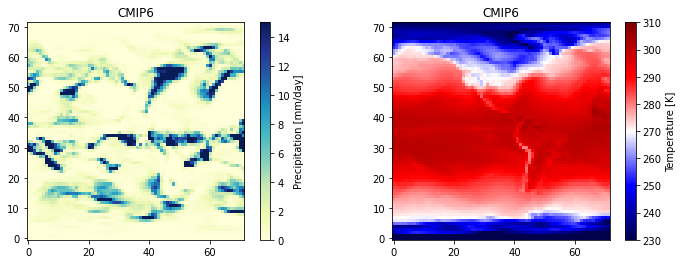

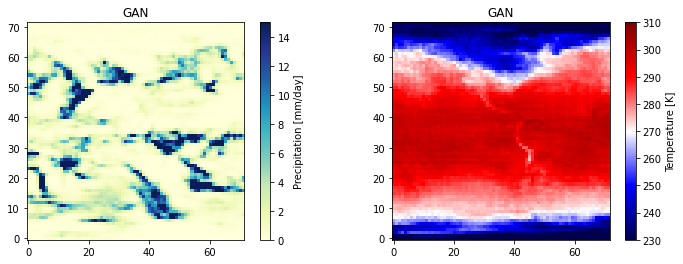

In [25]:
i = np.random.randint(100)
print(i)
plot_sample(target[i].cpu(), title='CMIP6')
plot_sample(gan[i].cpu(), title='GAN')

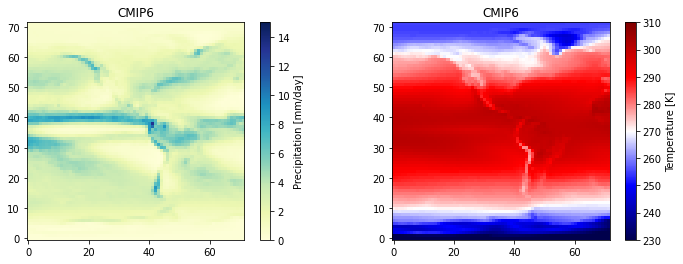

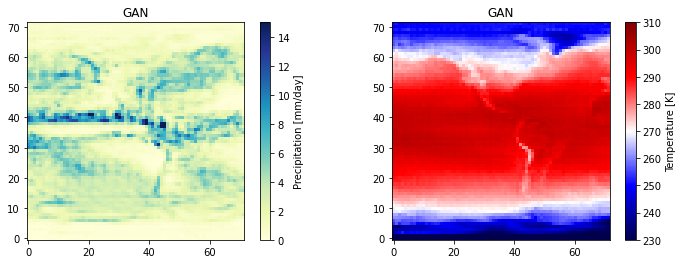

In [26]:
target_mean = target.mean(dim=0)
gan_mean = gan.mean(dim=0)
plot_sample(target_mean.cpu(), title='CMIP6')
plot_sample(gan_mean.cpu(), title='GAN')

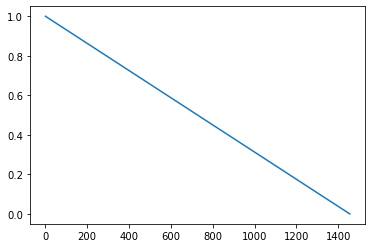

In [123]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.shape[0]//2:]

gan_mean = gan[:,:,40,20]
corr = autocorr(gan_mean[:,1])
plt.plot(corr/ float(corr.max()))

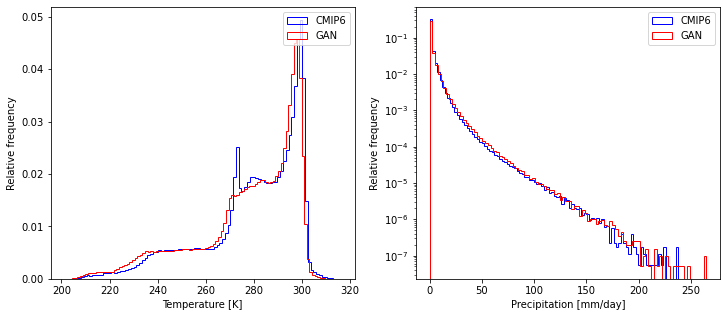

In [32]:
plot_histograms(gan, target)

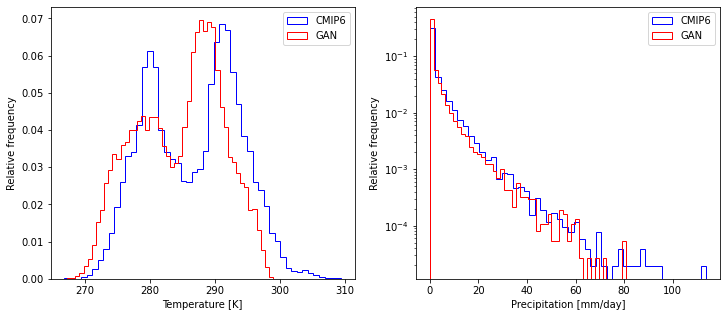

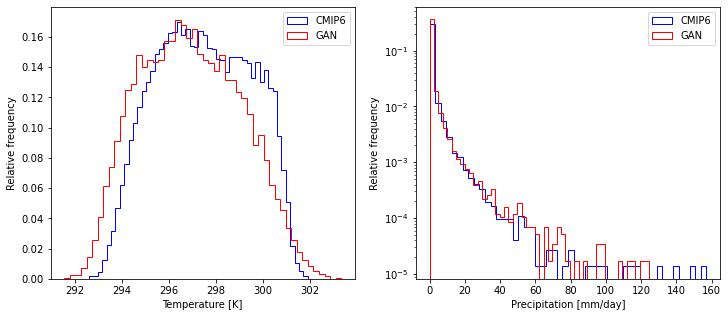

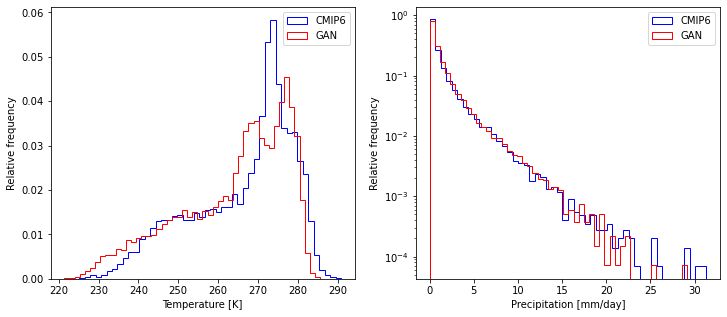

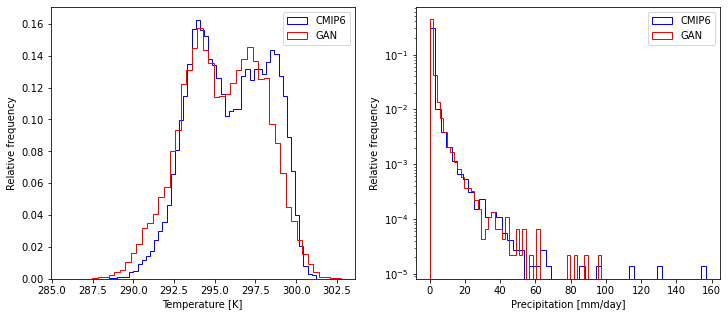

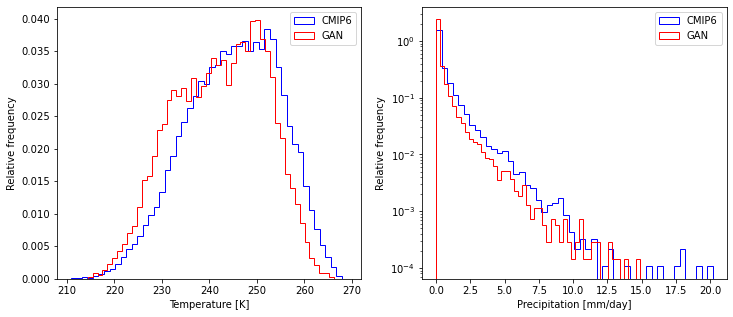

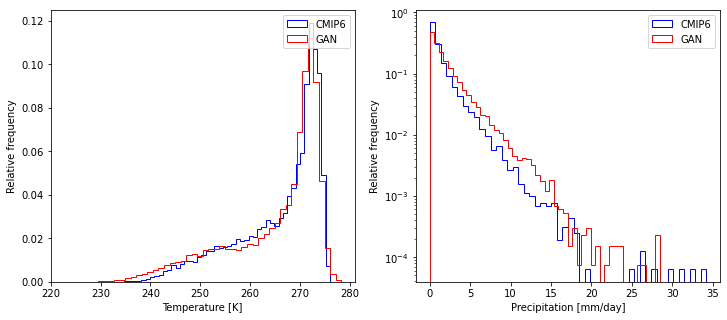

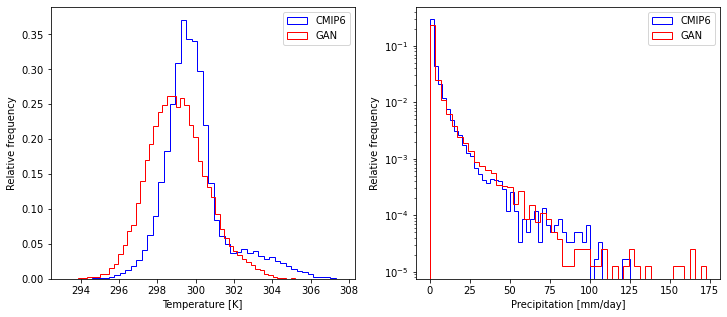

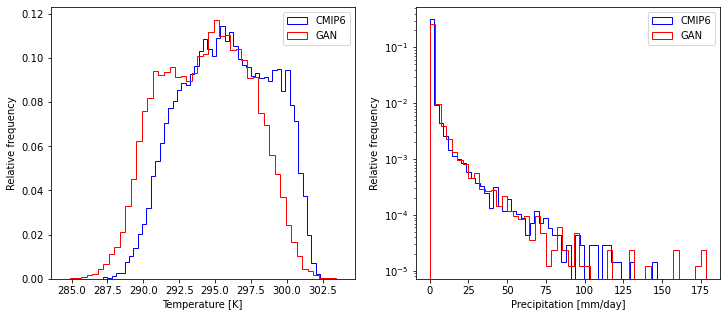

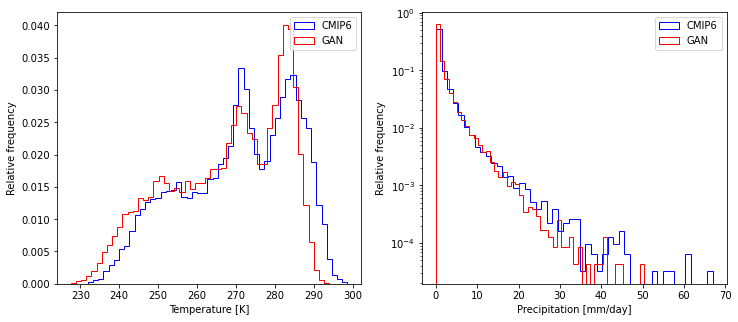

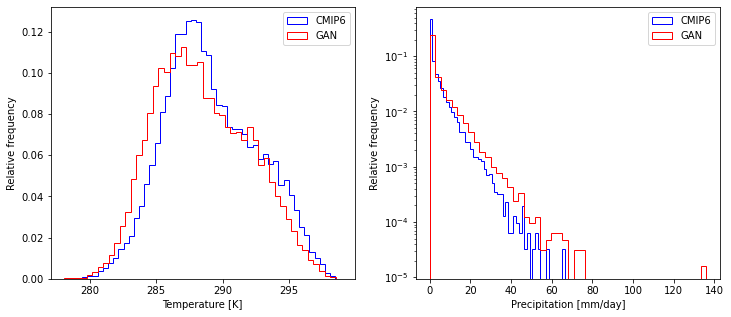

In [64]:
n_samples = 10
for s in range(n_samples):
    lat_idx = np.random.randint(2,70)
    lon_idx = np.random.randint(2,70)
    gan_data = gan[:,:,lat_idx-2:lat_idx+2,lon_idx-2:lon_idx+2]
    target_data = target[:,:,lat_idx-2:lat_idx+2,lon_idx-2:lon_idx+2]
    
    plot_histograms(gan_data, target_data)